In [1]:
#loading the necessary libraries
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras as keras
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the CIFAR-10 dataset
(train_data,train_labels),(test_data,test_labels) = keras.datasets.cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
from ipywidgets import interact

@interact(k=(0, len(train_data)-1))
def myplot(k):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.set_title(labels[train_labels[k][0]])
    ax.imshow(train_data[k])

interactive(children=(IntSlider(value=24999, description='k', max=49999), Output()), _dom_classes=('widget-int…

# Preparing the data

In [4]:
train_data.shape, type(train_data), test_data.shape

((50000, 32, 32, 3), numpy.ndarray, (10000, 32, 32, 3))

Here, the variable **train_data** is an array consisting of 50000 images, each of size 32 * 32 with 3 colour channels. Similarly, the variable **test_data** is an array of 10000 images, each of size 32 * 32 with 3 colour channels. 

In [5]:
print(train_labels.shape)
print(max(train_labels))
print(np.max(train_data))
print(np.max(test_data))

(50000, 1)
[9]
255
255


Here, the variable **train_labels** contains 50000 labels for each of the image in train_data. There are a total of 10 labels which are defined in the previous block of code. 

In the next cell, I am confirming whether the dataset is labelled correctly.

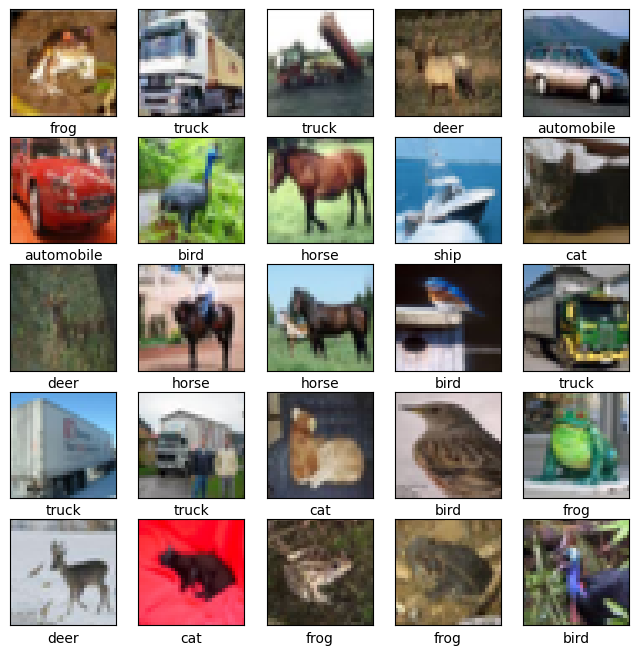

In [6]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(labels[train_labels[i][0]])

In [7]:
#normalizing the input images by dividing the each pixel value by the maximum value 255 to the interval between 0 and 1
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

#converting the input labels in train_labels and test_labels into categorical vector (one-hot encoding)
train_labels_cat = keras.utils.to_categorical(train_labels,10)
test_labels_cat = keras.utils.to_categorical(test_labels,10)

In [8]:
#data augmentation
data_aug = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1), # rotates by up to 36 degrees. 
    ]
)

Data augmentation is done so that the model can learn to be more robust to variations in the input data which can lead to the improvement of its accuracy and performance

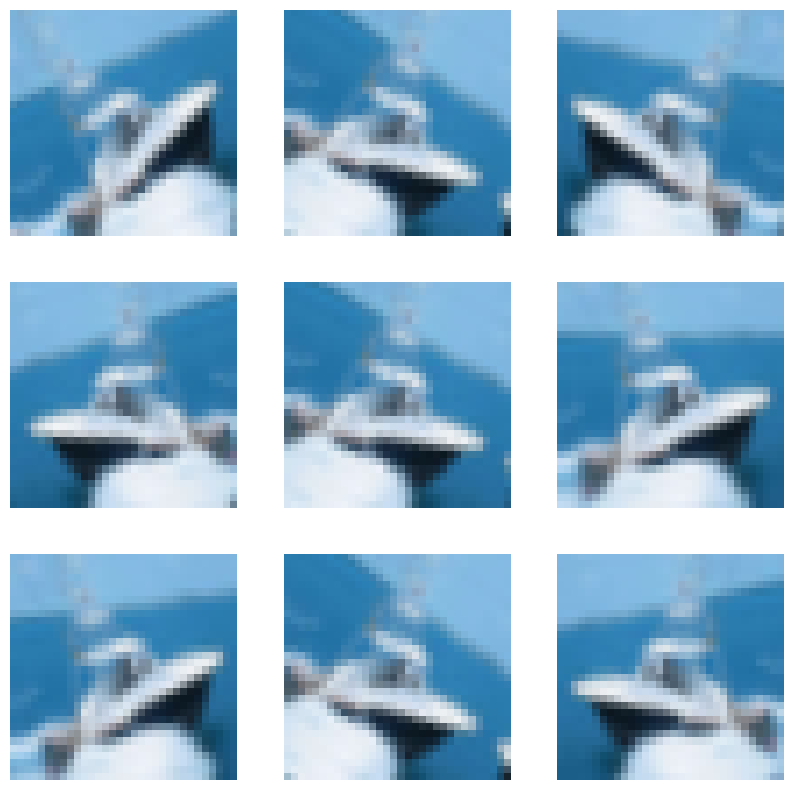

In [9]:
#to plot the data augmented images
plt.figure(figsize=(10, 10))
images = train_data[4:13]
for i in range(9):
    aug_images = data_aug(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(aug_images[4].numpy())
    plt.axis("off")

In [10]:
#specifying the input shape
input_shape = train_data.shape[1:]
input_shape

(32, 32, 3)

# Building the model

In [11]:
def make_model1(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    
    # Image augmentation block
    x = data_aug(inputs)

    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size = (1,1))(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size = (1,1))(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size = (1,1))(x)
    x = layers.Dropout(0.4)(x)

    x = layers.GlobalAveragePooling2D()(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return keras.Model(inputs, outputs)


model1 = make_model1(input_shape=input_shape, num_classes=10)

In [12]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          9248      
                                                             

# Training the model

In [13]:
epochs = 20

model1.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
start_time = time.time()
history1 = model1.fit(
    train_data, train_labels_cat, epochs=epochs, batch_size=64, validation_split = 0.2, shuffle = True
)

end_time = time.time()
elapsed_time = end_time - start_time

Epoch 1/20
625/625 [==============================] - 16s 23ms/step - loss: 1.8515 - accuracy: 0.3331 - val_loss: 1.5354 - val_accuracy: 0.4454
Epoch 2/20
625/625 [==============================] - 15s 23ms/step - loss: 1.5481 - accuracy: 0.4375 - val_loss: 1.4196 - val_accuracy: 0.4806
Epoch 3/20
625/625 [==============================] - 14s 23ms/step - loss: 1.4442 - accuracy: 0.4785 - val_loss: 1.5388 - val_accuracy: 0.4473
Epoch 4/20
625/625 [==============================] - 15s 23ms/step - loss: 1.3752 - accuracy: 0.5045 - val_loss: 1.3264 - val_accuracy: 0.5309
Epoch 5/20
625/625 [==============================] - 15s 23ms/step - loss: 1.3203 - accuracy: 0.5250 - val_loss: 1.1812 - val_accuracy: 0.5814
Epoch 6/20
625/625 [==============================] - 15s 24ms/step - loss: 1.2794 - accuracy: 0.5435 - val_loss: 1.1677 - val_accuracy: 0.5851
Epoch 7/20
625/625 [==============================] - 15s 24ms/step - loss: 1.2458 - accuracy: 0.5556 - val_loss: 1.2870 - val_accuracy:

In [14]:
history_dict = history1.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

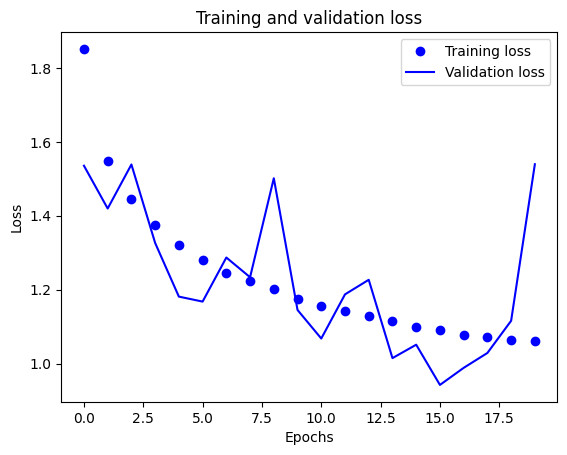

In [15]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = history1.epoch

# to plot the training and validation loss against number of epochs
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

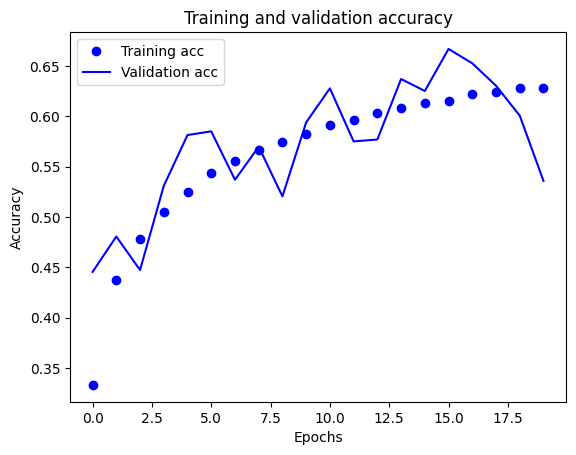

In [16]:
# to plot the training and validation accuracy against number of epochs
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Evaluating the model performance

In [17]:
loss1, accuracy1 = model1.evaluate(test_data, test_labels_cat, batch_size=128, verbose=1)

print('Test accuracy:', accuracy1)
print("Time taken: ", elapsed_time, "seconds")

79/79 [==============================] - 1s 10ms/step - loss: 1.5446 - accuracy: 0.5268
Test accuracy: 0.5267999768257141
Time taken:  300.3428153991699 seconds


The model architecture in make_model1 has the following layers: 

Convolution layers of various filters (32, 64, 128)

Batch normalization layer : This layer is used to increase the stability and speed of the training by normalizing the activations in each layer

Activation layer : This layer introduces non-linearity in the model

Pooling layer: This layer reduces the spatial dimensionality of the input and extract important features from the data.

Dense layer: This dense layer along with softmax activation function classifies the input data into 10 classes where the softmax function gives the probability distribution of the input image among 10 different classes.

The test accuracy of the model defined in make_model1 is 52.68% and the time taken to train the model is 300.343 seconds.

In [18]:
def make_model2(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    
    # Image augmentation block
    x = data_aug(inputs)

    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return keras.Model(inputs, outputs)

model2 = make_model2(input_shape=input_shape, num_classes=10)

In [19]:
epochs = 20

model2.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
start_time = time.time()
history2 = model2.fit(
    train_data, train_labels_cat, epochs=epochs, batch_size=64, validation_split = 0.2, shuffle = True
)

end_time = time.time()
elapsed_time = end_time - start_time

loss2, accuracy2 = model2.evaluate(test_data, test_labels_cat, batch_size=128, verbose=1)
print('Test accuracy:', accuracy2)
print("Time taken: ", elapsed_time, "seconds")

Epoch 1/20
625/625 [==============================] - 15s 22ms/step - loss: 1.5754 - accuracy: 0.4284 - val_loss: 1.4307 - val_accuracy: 0.4822
Epoch 2/20
625/625 [==============================] - 13s 21ms/step - loss: 1.3094 - accuracy: 0.5283 - val_loss: 1.4437 - val_accuracy: 0.4916
Epoch 3/20
625/625 [==============================] - 13s 20ms/step - loss: 1.2031 - accuracy: 0.5697 - val_loss: 1.5147 - val_accuracy: 0.4823
Epoch 4/20
625/625 [==============================] - 13s 21ms/step - loss: 1.1261 - accuracy: 0.5970 - val_loss: 1.2879 - val_accuracy: 0.5614
Epoch 5/20
625/625 [==============================] - 13s 21ms/step - loss: 1.0774 - accuracy: 0.6145 - val_loss: 1.3488 - val_accuracy: 0.5449
Epoch 6/20
625/625 [==============================] - 13s 21ms/step - loss: 1.0293 - accuracy: 0.6343 - val_loss: 1.2735 - val_accuracy: 0.5681
Epoch 7/20
625/625 [==============================] - 14s 22ms/step - loss: 0.9959 - accuracy: 0.6453 - val_loss: 1.4024 - val_accuracy:

In the model architecture defined in make_model2, I have removed the MaxPooling layer as well as the dropout layer to observe the model performance when compared with make_model1.

The test accuracy of the model defined in make_model2 is 70.85% and the time taken to train the model is 277.576 seconds

In [20]:
def make_model3(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size = (1,1))(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size = (1,1))(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size = (1,1))(x)
    x = layers.Dropout(0.4)(x)

    x = layers.GlobalAveragePooling2D()(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return keras.Model(inputs, outputs)


model3 = make_model3(input_shape=input_shape, num_classes=10)

In [21]:
epochs = 20

model3.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
start_time = time.time()
history3 = model3.fit(
    train_data, train_labels_cat, epochs=epochs, batch_size=64, validation_split = 0.2, shuffle = True
)

end_time = time.time()
elapsed_time = end_time - start_time

loss3, accuracy3 = model3.evaluate(test_data, test_labels_cat, batch_size=128, verbose=1)
print('Test accuracy:', accuracy3)
print("Time taken: ", elapsed_time, "seconds")

Epoch 1/20
625/625 [==============================] - 16s 23ms/step - loss: 1.7916 - accuracy: 0.3559 - val_loss: 1.6150 - val_accuracy: 0.4185
Epoch 2/20
625/625 [==============================] - 13s 21ms/step - loss: 1.4334 - accuracy: 0.4799 - val_loss: 1.5108 - val_accuracy: 0.4795
Epoch 3/20
625/625 [==============================] - 13s 21ms/step - loss: 1.2981 - accuracy: 0.5322 - val_loss: 1.2015 - val_accuracy: 0.5751
Epoch 4/20
625/625 [==============================] - 14s 22ms/step - loss: 1.2195 - accuracy: 0.5649 - val_loss: 1.2888 - val_accuracy: 0.5401
Epoch 5/20
625/625 [==============================] - 277s 443ms/step - loss: 1.1467 - accuracy: 0.5929 - val_loss: 1.3695 - val_accuracy: 0.5196
Epoch 6/20
625/625 [==============================] - 11s 18ms/step - loss: 1.0937 - accuracy: 0.6127 - val_loss: 1.1947 - val_accuracy: 0.5772
Epoch 7/20
625/625 [==============================] - 12s 20ms/step - loss: 1.0465 - accuracy: 0.6309 - val_loss: 1.0919 - val_accurac

In the model architecture defined in make_model3, I removed the data augmentation of the input images to observe the model performance when compared with make_model1.

The test accuracy of the model defined in make_model3 is 68.84% and the time taken to train the model is 570.334 seconds

313/313 [==============================] - 1s 4ms/step


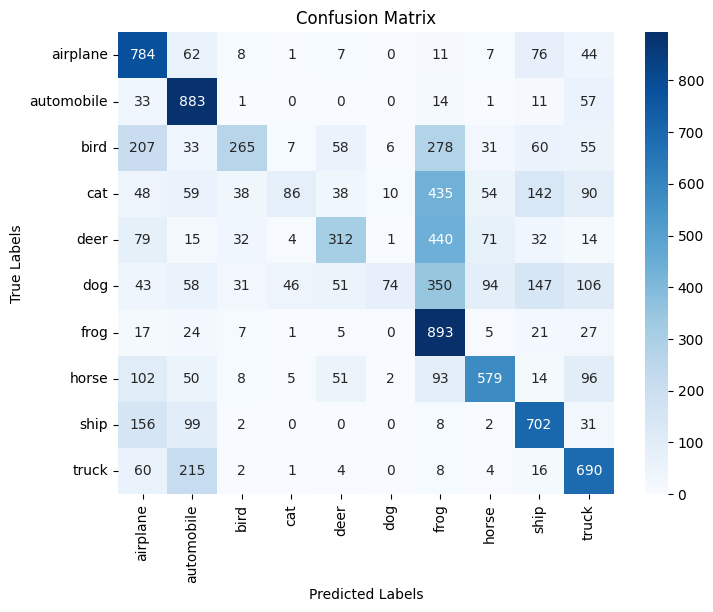

In [22]:
# Confusion Matrix
y_pred = np.argmax(model1.predict(test_data), axis=1)
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The confusion matrix is a summary of a classification model's predictions, displaying the number of correct and incorrect classifications for each class in tabular form. It provides valuable insights into the model's performance, highlighting which classes it excels at predicting and which it struggles with. In this case, the model demonstrates higher accuracy for classes like 'airplane', 'automobile', 'frog', and 'ship', but faces challenges in accurately predicting 'bird', 'cat', and 'dog' classes. Further improvements could be achieved by fine-tuning the model architecture and exploring better data augmentation techniques.

In [23]:
# Classification Report
print("Classification Report:")
print(classification_report(test_labels, y_pred, target_names=labels))

Classification Report:
              precision    recall  f1-score   support

    airplane       0.51      0.78      0.62      1000
  automobile       0.59      0.88      0.71      1000
        bird       0.67      0.27      0.38      1000
         cat       0.57      0.09      0.15      1000
        deer       0.59      0.31      0.41      1000
         dog       0.80      0.07      0.14      1000
        frog       0.35      0.89      0.51      1000
       horse       0.68      0.58      0.63      1000
        ship       0.57      0.70      0.63      1000
       truck       0.57      0.69      0.62      1000

    accuracy                           0.53     10000
   macro avg       0.59      0.53      0.48     10000
weighted avg       0.59      0.53      0.48     10000



Based on the classification report, we can analyze the performance of the model in classifying the different categories:


**Precision** : Precision represents the ability of the model to correctly identify the true positives among the predicted positive samples for each class. It is calculated as the ratio of true positives to the sum of true positives and false positives. For example, the precision for the 'ship' class is 0.87, indicating that when the model predicts an image as a ship, it is correct 87% of the time.

**Recall** : Recall, also known as sensitivity or true positive rate, represents the ability of the model to correctly identify the true positives among all the actual positive samples for each class. It is calculated as the ratio of true positives to the sum of true positives and false negatives. For instance, the recall for the 'cat' class is 0.39, indicating that the model correctly identifies only 39% of the actual cat images.

**F1-score** : The F1-score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall, especially when there is an imbalance in the dataset. The F1-score for the 'truck' class is 0.74, which considers both precision and recall.

**Support** : Support represents the number of occurrences of each class in the test dataset. It is the actual number of samples for each class. For example, the 'airplane' and 'automobile' classes have 1000 samples each.

### Overall Accuracy and Macro/Micro Average:

The accuracy of the model on the entire test dataset is 0.68, which means it correctly predicts 68% of the samples. The macro average F1-score (0.67) represents the unweighted mean of the F1-scores across all classes, giving equal importance to each class. The weighted average F1-score (0.67) accounts for class imbalance by considering the number of samples in each class.

Observations:

The model performs relatively well in distinguishing 'ship', 'automobile', 'frog', and 'horse' classes, as they have higher precision, recall, and F1-scores compared to other classes.

1. The 'cat' and 'deer' classes have lower precision and recall, indicating that the model struggles to correctly classify these categories.

2. The 'bird' class also has relatively lower precision and recall, indicating room for improvement.

3. The 'ship' class has the highest precision, but its recall is relatively lower, indicating that while the model correctly identifies many ships, it also misses some actual ship images.

4. The 'automobile' class has the highest F1-score, indicating a good balance between precision and recall.

5. The 'dog' class shows moderate performance, with a decent F1-score but slightly lower precision compared to recall.

In conclusion, the model exhibits varying levels of performance across different classes, with some categories showing better discrimination than others. Further fine-tuning of the model architecture and data augmentation techniques may help improve the overall accuracy and performance, especially for classes with lower precision and recall. Additionally, investigating misclassified samples and exploring advanced techniques, such as transfer learning, might lead to further enhancement of the model's performance on this classification task.

Please note that the presented classification report corresponds to model1.

# Computing time and accuracy

There are various number of factors that can effect the computing time as well as the accuarcy in training the model. The factors that can be considered are as follows:

**Model architecture**: If the model build is more complex,i.e., if more number of different layers, more number of neurons are added, after fine tuning, we might get an efficient model, which in turn might give an improved prediction accuracy but it might take more time to fit the model. In this case, it took more processing time as there was a more trainable parameter to compute and execute the results. Also, I have observed that mindlessly defining layers will not improve the model performance, in fact, it can decrease the model's accuracy.

**Batch Size**: In the above model defined, I tried to change the batch size. It was observed that when increase the batch size, the model was trained faster hence decreasing the processing time but it resulted in the lower accuracy than before.

**Epochs**: More number of epochs increases the processing time and also it might lead to overfitting.

**Regularization**: Adding a dropout layer is one of the form of regularization techniques. Dropout layers are used to randomly drop out some percentage of nodes / neurons in every layer during training the model. After this, the model has to run with the remaining nodes and try to optimize the weights and biases values and avoid overfitting. Adding a dropout layer of 0.5 means that 50% of neurons are dropped after each training so that the model must understand the input data and the pattern even with less amount of information provided in the next step. This may lead to an increased performance but it might also increase the processing time.

**Data Augmentation**: Data augmentation, as mentioned before, is done to apply various image transformation(such as flipping, rotating, zooming, changing the brightness, contrast, saturation) to the input data, so that the mdoel can recognize variation of a single image belonging to a particular class and make better predictions. It also increases the number of input data fed into the model in addition with the input training data which increases the computing time. But in this case, in the make_model3, I removed the data augmentation and observed that the test accuracy was more when compared with make_model1. Thus, fine tuning of the model architecture is required to get more prediction accuracy along with the data augmentation.